# Modules in Python

Reference: <br>
University of College London Python lecture note <br>
MIT Python lecture note <br>
Scipy lecture notes (http://scipy-lectures.org/index.html)

When you import a full module, you can access its functions or constant using the "dot notation":

In [2]:
import math
print(math.sqrt(2))
print(math.pi)

1.4142135623730951
3.141592653589793


It goes hierarchically in the module. Some modules have multiple levels, e.g.: 

In [4]:
import numpy
numpy.random.rand()   # Random number generation

0.6624402112897089

## Some modules that we will be using in this class

### numpy
- A powerful n-dimensional array object
- Useful linear algebra, Fourier transfor, and random number capavilities
- http://www.numpy.org/

### matplotlib
- Flexible 2D plotting library
- Produces publication quality figures
- http://matplotlib.org/

# Creating numpy arrays 

1. a Python list
2. using functions that are dedicated to generating numpy arrays, such as arange, linspace etc.
3. Reading data from files

### From lists

In [3]:
import numpy as np
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [9]:
M = np.array([[1,2],[3,4]])
M

array([[1, 2],
       [3, 4]])

In [10]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [11]:
v.shape, M.shape

((4,), (2, 2))

In [12]:
v.size, M.size

(4, 4)

In [13]:
np.shape(M), np.size(M)

((2, 2), 4)

### Using array-generating functions
For larger arrays it is more practical to use numpy functions that generate arrays of different forms.

#### arange

In [8]:
# create a range
a = np.arange(0,10,1)  # arguments: start, stop, step
print(a)

[0 1 2 3 4 5 6 7 8 9]


### Exercise: 
Create an array (x) from 0 to 100 with an increment of 5 and print.

#### Zeros and ones

In [16]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Exercise: 
Create a 4x2 matrix (4 columns and 2rows) consist of zeros.

# Making plots

### Using the matplotlib module

In [3]:
import matplotlib.pyplot as plt

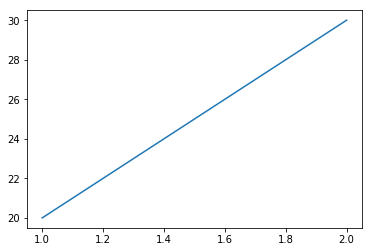

In [4]:
plt.plot([1,2],[20,30])

### Jupyter notebook: 
For interactive matplotlib sessions, turn on the matplotlib mode. 	
In the notebook, insert, at the beginning of the notebook the following magic:

In [16]:
%matplotlib inline

#### Exercise
Create an array y = x$^2$ + 2x and print.

#### Exercise
Create a plot using x and y.

## Advanced (Optional)

In [3]:
import xarray as xr
file='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc'
#file="absolute_v5.nc" # 1961-1990 mean 
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 877)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-01-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Thu May  4 20:11:16 2000: ncrcat -d time...
    title:                           monthly mean air.sig995 from the NCEP Re...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

Calcuate monthly average temperature at each grid.

In [4]:
ta=ds.air
ta_clim = ta.groupby('time.month').mean(dim='time')
ta_clim

<xarray.DataArray 'air' (month: 12, lat: 73, lon: 144)>
array([[[-30.037918, -30.037918, -30.037918, ..., -30.037918,
         -30.037918, -30.037918],
        [-31.012497, -30.973217, -30.935854, ..., -31.13332 ,
         -31.091883, -31.052256],
        [-30.877504, -30.591196, -30.304354, ..., -31.67834 ,
         -31.427761, -31.159094],
        ...,
        [-19.958271, -19.80216 , -19.650719, ..., -20.296246,
         -20.223845, -20.104914],
        [-20.738298, -20.76126 , -20.780048, ..., -20.616312,
         -20.667658, -20.707422],
        [-22.500557, -22.500557, -22.500557, ..., -22.500557,
         -22.500557, -22.500557]],

       [[-30.63283 , -30.63283 , -30.63283 , ..., -30.63283 ,
         -30.63283 , -30.63283 ],
        [-31.456573, -31.400267, -31.344563, ..., -31.630676,
         -31.572218, -31.514307],
        [-31.192875, -30.880375, -30.567854, ..., -32.06053 ,
         -31.789818, -31.49897 ],
...
        [-30.17432 , -30.037996, -29.900534, ..., -30.384655,
         -30.366291, -30.289639],
        [-30.626917, -30.668922, -30.701567, ..., -30.425955,
         -30.507502, -30.574352],
        [-31.28549 , -31.28549 , -31.28549 , ..., -31.28549 ,
         -31.28549 , -31.28549 ]],

       [[-28.689373, -28.689373, -28.689373, ..., -28.689373,
         -28.689373, -28.689373],
        [-29.696526, -29.662495, -29.628231, ..., -29.795961,
         -29.762619, -29.729923],
        [-29.769016, -29.506756, -29.240297, ..., -30.46602 ,
         -30.25394 , -30.019852],
        ...,
        [-19.177973, -19.04765 , -18.9276  , ..., -19.462276,
         -19.401194, -19.301098],
        [-20.308363, -20.345507, -20.378752, ..., -20.149796,
         -20.211988, -20.264002],
        [-22.151125, -22.151125, -22.151125, ..., -22.151125,
         -22.151125, -22.151125]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Plot January average temperature.

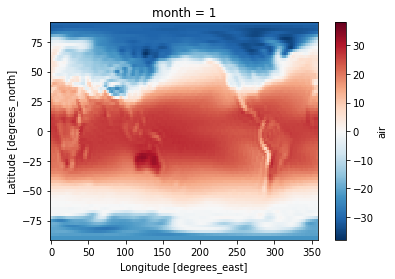

In [10]:
ta_clim.isel(month=0).plot()

### Optional exercise
Plot July average temperature.

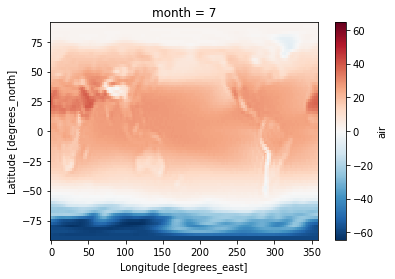

In [6]:
ta_clim.isel(month=6).plot()

Plot the difference between January and July temperature.

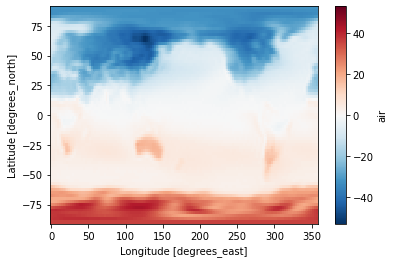

In [7]:
(ta_clim.isel(month=0)-ta_clim.isel(month=6)).plot()